# Problem statement

Restaurant Cuisine Requirement Prediction: Analyse historical dataset of restaurant and forecast the demand for next month based on area, cuisine on a daily basis.
 

Why: If we can forecast demand for cuisine on a daily basis so restaurant management can handle ingredients more efficiently by making them available based on requirement. It helps management people to come up with effective planning to improve their business by reducing wastage of  ingredients and employee management. They can meet customer demand.

 

Dataset: https://1drv.ms/u/s!AkRHVr8iOpMEgkig4pih_y1FszF9?e=cEKbBf

 

Project requirements: 

Git and Github are mandatory for your project.
Dockerize your entire training pipeline and deploy it on any cloud using github action.
Ex-: Free cloud like -: Vercel, Netlify, Heroku, Railway App

Expose your model as an API for prediction
API must be deployed using docker containers.
All artifact from the training pipeline should be versioned and stored/archived in any cloud or remote storage.
 

What to Submit 
·    Provide a URL to your working prototype.  

·    Provide a URL to your GitHub code repository. Repository must be public and have an open source licence from one of the following:  

·         MIT - https://opensource.org/licenses/MIT   

·        Apache 2.0 - https://opensource.org/licenses/Apache-2.0   

·        3-Clause BSD - https://opensource.org/licenses/BSD-3-Clause  

·    Include a video (3-5 minutes) that demonstrates your project in action (hosted on YouTube, LinkedIn, or Facebook Video and made public). Video must include an explanation.

# Team Members
#### Ashwin Kumar S
#### Anirudh Sai Kaki
#### Manish Sagar
#### Mahesh Vuppu

In [1]:
import pandas as pd, numpy as np

In [2]:
df = pd.read_csv('restaurant_data.csv')
df.head()

,url,address,name,online_order,book_table,rate,votes,phone,location,rest_type,dish_liked,cuisines,approx_cost(for two people),reviews_list,menu_item,listed_in(type),listed_in(city),order_date
0,https://www.zomato.com/bangalore/jalsa-banasha...,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Jalsa,Yes,Yes,4.1/5,775,080 42297555\r\n+91 9743772233,Banashankari,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800,"[('Rated 4.0', 'RATED\n A beautiful place to ...",[],Buffet,Banashankari,2022-03-23
1,https://www.zomato.com/bangalore/spice-elephan...,"2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...",Spice Elephant,Yes,No,4.1/5,787,080 41714161,Banashankari,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800,"[('Rated 4.0', 'RATED\n Had been here for din...",[],Buffet,Banashankari,2022-04-16
2,https://www.zomato.com/SanchurroBangalore?cont...,"1112, Next to KIMS Medical College, 17th Cross...",San Churro Cafe,Yes,No,3.8/5,918,+91 9663487993,Banashankari,"Cafe, Casual Dining","Churros, Cannelloni, Minestrone Soup, Hot Choc...","Cafe, Mexican, Italian",800,"[('Rated 3.0', ""RATED\n Ambience is not that ...",[],Buffet,Banashankari,2022-03-14
3,https://www.zomato.com/bangalore/addhuri-udupi...,"1st Floor, Annakuteera, 3rd Stage, Banashankar...",Addhuri Udupi Bhojana,No,No,3.7/5,88,+91 9620009302,Banashankari,Quick Bites,Masala Dosa,"South Indian, North Indian",300,"[('Rated 4.0', ""RATED\n Great food and proper...",[],Buffet,Banashankari,2022-05-09
4,https://www.zomato.com/bangalore/grand-village...,"10, 3rd Floor, Lakshmi Associates, Gandhi Baza...",Grand Village,No,No,3.8/5,166,+91 8026612447\r\n+91 9901210005,Basavanagudi,Casual Dining,"Panipuri, Gol Gappe","North Indian, Rajasthani",600,"[('Rated 4.0', 'RATED\n Very good restaurant ...",[],Buffet,Banashankari,2022-03-19


In [142]:
ids = ['url','phone','reviews_list','address','name','dish_liked','menu_item','listed_in(type)','listed_in(city)']
data = df.drop(ids,axis=1)
data.head()

,online_order,book_table,rate,votes,location,rest_type,cuisines,approx_cost(for two people),order_date
0,Yes,Yes,4.1/5,775,Banashankari,Casual Dining,"North Indian, Mughlai, Chinese",800,2022-03-23
1,Yes,No,4.1/5,787,Banashankari,Casual Dining,"Chinese, North Indian, Thai",800,2022-04-16
2,Yes,No,3.8/5,918,Banashankari,"Cafe, Casual Dining","Cafe, Mexican, Italian",800,2022-03-14
3,No,No,3.7/5,88,Banashankari,Quick Bites,"South Indian, North Indian",300,2022-05-09
4,No,No,3.8/5,166,Basavanagudi,Casual Dining,"North Indian, Rajasthani",600,2022-03-19


In [143]:
data.isnull().sum()

online_order                      0
book_table                        0
rate                           7775
votes                             0
location                         21
rest_type                       227
cuisines                         45
approx_cost(for two people)     346
order_date                        0
dtype: int64

# Data analyhsis

In [144]:
data.shape

(51717, 9)

In [145]:
data = data.dropna()

In [146]:
data.shape

(43533, 9)

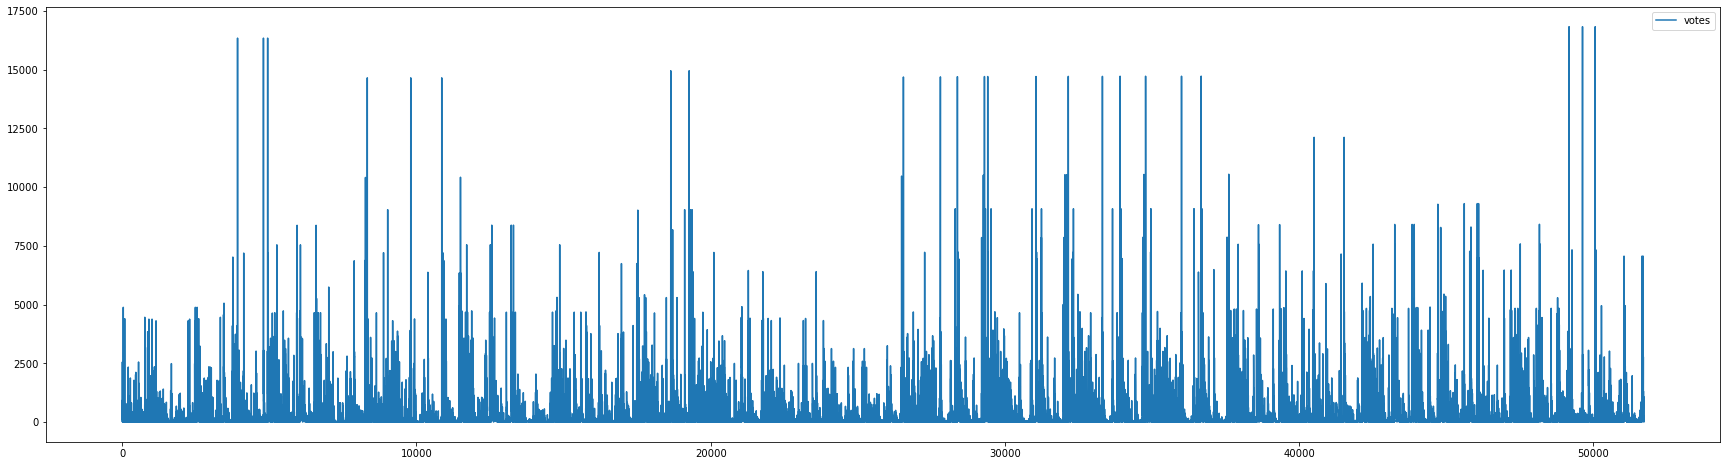

In [147]:
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [30, 8]
data.plot()
plt.show()

##### cuisines

In [52]:
cuisines=[]
for i in data.cuisines:
    try:
        for j in i.split(','):
            if j not in cuisines:
                print(j)
                cuisines.append(j)
    except:
        print('!!!***!!!')
        print('exception occured')
        print(i)

North Indian
 Mughlai
 Chinese
Chinese
 North Indian
 Thai
Cafe
 Mexican
 Italian
South Indian
 Rajasthani
 South Indian
 Andhra
Pizza
 Cafe
 Continental
 Momos
 Beverages
 Fast Food
 American
 French
 Pizza
Italian
 European
 Bakery
 Burger
Bakery
 Desserts
 Biryani
Biryani
Street Food
Burger
 Rolls
Fast Food
 Street Food
Ice Cream
Healthy Food
 Salad
Asian
 Korean
 Indonesian
 Japanese
Desserts
Goan
 Seafood
 Kebab
Continental
 Steak
Seafood
Beverages
 Ice Cream
Mithai
 Iranian
 Sandwich
Sandwich
Mangalorean
 Juices
 Mithai
Thai
 Vietnamese
 Asian
Salad
 Healthy Food
 Hyderabadi
Bengali
Arabian
BBQ
 Arabian
 BBQ
Vietnamese
Andhra
 Mangalorean
 Tea
Juices
 Afghani
Mexican
Rolls
 Lebanese
 Finger Food
Tibetan
Tea
Momos
 Tibetan
 Charcoal Chicken
Hyderabadi
Finger Food
Mughlai
Kebab
 Middle Eastern
 Mediterranean
 Wraps
Kerala
 Kerala
Oriya
 Bihari
 Roast Chicken
Maharashtrian
Bohri
African
American
 Bengali
Rajasthani
 Nepalese
Turkish
Tamil
 Tex-Mex
 Belgian
 Gujarati
Roast Chicken
Gu

In [53]:
len(cuisines)

187

##### rest_type

In [54]:
rest_type=[]
for i in data.rest_type:
    if i is float('nan'):
        continue
    for j in i.split(','):
        if j not in rest_type:
            print(j)
            rest_type.append(j)

Casual Dining
Cafe
 Casual Dining
Quick Bites
 Cafe
 Quick Bites
Delivery
Mess
Dessert Parlor
Bakery
 Dessert Parlor
Pub
Takeaway
 Delivery
Fine Dining
Beverage Shop
Sweet Shop
Bar
 Sweet Shop
Kiosk
Food Truck
 Bar
 Beverage Shop
 Bakery
Microbrewery
Lounge
Food Court
Dhaba
 Pub
 Microbrewery
 Food Court
Club
 Irani Cafee
 Lounge
Confectionery
 Kiosk
Bhojanalya
 Mess
 Meat Shop


In [55]:
len(rest_type)

39

# Converting dataset to individual cuisines

In [56]:
data

,online_order,book_table,rate,votes,location,rest_type,cuisines,approx_cost(for two people),listed_in(type),listed_in(city),order_date
0,Yes,Yes,4.1/5,775,Banashankari,Casual Dining,"North Indian, Mughlai, Chinese",800,Buffet,Banashankari,2022-03-23
1,Yes,No,4.1/5,787,Banashankari,Casual Dining,"Chinese, North Indian, Thai",800,Buffet,Banashankari,2022-04-16
2,Yes,No,3.8/5,918,Banashankari,"Cafe, Casual Dining","Cafe, Mexican, Italian",800,Buffet,Banashankari,2022-03-14
3,No,No,3.7/5,88,Banashankari,Quick Bites,"South Indian, North Indian",300,Buffet,Banashankari,2022-05-09
4,No,No,3.8/5,166,Basavanagudi,Casual Dining,"North Indian, Rajasthani",600,Buffet,Banashankari,2022-03-19
...,...,...,...,...,...,...,...,...,...,...,...
51709,No,No,3.7 /5,34,Whitefield,"Casual Dining, Bar","North Indian, Continental",800,Pubs and bars,Whitefield,2022-05-26
51711,No,No,2.5 /5,81,Whitefield,"Casual Dining, Bar","Andhra, South Indian, Chinese, North Indian",800,Pubs and bars,Whitefield,2022-03-30
51712,No,No,3.6 /5,27,Whitefield,Bar,Continental,"1,500",Pubs and bars,Whitefield,2022-03-19
51715,No,Yes,4.3 /5,236,"ITPL Main Road, Whitefield",Bar,Finger Food,"2,500",Pubs and bars,Whitefield,2022-05-18


In [57]:
cuisines

['North Indian',
 ' Mughlai',
 ' Chinese',
 'Chinese',
 ' North Indian',
 ' Thai',
 'Cafe',
 ' Mexican',
 ' Italian',
 'South Indian',
 ' Rajasthani',
 ' South Indian',
 ' Andhra',
 'Pizza',
 ' Cafe',
 ' Continental',
 ' Momos',
 ' Beverages',
 ' Fast Food',
 ' American',
 ' French',
 ' Pizza',
 'Italian',
 ' European',
 ' Bakery',
 ' Burger',
 'Bakery',
 ' Desserts',
 ' Biryani',
 'Biryani',
 'Street Food',
 'Burger',
 ' Rolls',
 'Fast Food',
 ' Street Food',
 'Ice Cream',
 'Healthy Food',
 ' Salad',
 'Asian',
 ' Korean',
 ' Indonesian',
 ' Japanese',
 'Desserts',
 'Goan',
 ' Seafood',
 ' Kebab',
 'Continental',
 ' Steak',
 'Seafood',
 'Beverages',
 ' Ice Cream',
 'Mithai',
 ' Iranian',
 ' Sandwich',
 'Sandwich',
 'Mangalorean',
 ' Juices',
 ' Mithai',
 'Thai',
 ' Vietnamese',
 ' Asian',
 'Salad',
 ' Healthy Food',
 ' Hyderabadi',
 'Bengali',
 'Arabian',
 'BBQ',
 ' Arabian',
 ' BBQ',
 'Vietnamese',
 'Andhra',
 ' Mangalorean',
 ' Tea',
 'Juices',
 ' Afghani',
 'Mexican',
 'Rolls',
 ' L

##### Label Encoding

In [148]:
from sklearn.preprocessing import LabelEncoder

In [149]:
le_ids=['online_order' ,'book_table','location','rest_type']
le_lists=[]
for ids in le_ids:
    le = LabelEncoder()
    data[ids] = le.fit_transform(data[ids])
    le_lists.append(le)

In [150]:
data.head()

,online_order,book_table,rate,votes,location,rest_type,cuisines,approx_cost(for two people),order_date
0,1,1,4.1/5,775,1,24,"North Indian, Mughlai, Chinese",800,2022-03-23
1,1,0,4.1/5,787,1,24,"Chinese, North Indian, Thai",800,2022-04-16
2,1,0,3.8/5,918,1,19,"Cafe, Mexican, Italian",800,2022-03-14
3,0,0,3.7/5,88,1,73,"South Indian, North Indian",300,2022-05-09
4,0,0,3.8/5,166,4,24,"North Indian, Rajasthani",600,2022-03-19


In [151]:
# Modifying rating
data.rate = [str(i).split('/')[0] for i in list(data.rate)]

In [152]:
data.head()

,online_order,book_table,rate,votes,location,rest_type,cuisines,approx_cost(for two people),order_date
0,1,1,4.1,775,1,24,"North Indian, Mughlai, Chinese",800,2022-03-23
1,1,0,4.1,787,1,24,"Chinese, North Indian, Thai",800,2022-04-16
2,1,0,3.8,918,1,19,"Cafe, Mexican, Italian",800,2022-03-14
3,0,0,3.7,88,1,73,"South Indian, North Indian",300,2022-05-09
4,0,0,3.8,166,4,24,"North Indian, Rajasthani",600,2022-03-19


In [153]:
data.isnull().sum()

online_order                   0
book_table                     0
rate                           0
votes                          0
location                       0
rest_type                      0
cuisines                       0
approx_cost(for two people)    0
order_date                     0
dtype: int64

In [154]:
# Encoding Cuisines
ll=[]
for cuisine in data['cuisines']:
    s=''
    for cu in str(cuisine).split(','):
        s+=str(cuisines.index(cu))
    ll.append(s)
data['cuisines']=ll

In [155]:
data

,online_order,book_table,rate,votes,location,rest_type,cuisines,approx_cost(for two people),order_date
0,1,1,4.1,775,1,24,012,800,2022-03-23
1,1,0,4.1,787,1,24,345,800,2022-04-16
2,1,0,3.8,918,1,19,678,800,2022-03-14
3,0,0,3.7,88,1,73,94,300,2022-05-09
4,0,0,3.8,166,4,24,010,600,2022-03-19
...,...,...,...,...,...,...,...,...,...
51709,0,0,3.7,34,88,25,015,800,2022-05-26
51711,0,0,2.5,81,88,25,701124,800,2022-03-30
51712,0,0,3.6,27,88,6,46,"1,500",2022-03-19
51715,0,1,4.3,236,26,6,85,"2,500",2022-05-18


In [156]:
data.describe()

,online_order,book_table,votes,location,rest_type
count,43533.000000,43533.000000,43533.000000,43533.000000,43533.000000
mean,0.647830,0.147773,334.292743,35.491719,45.802724
std,0.477652,0.354879,864.379779,26.466149,26.182086
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,17.000000,12.000000,24.000000
50%,1.000000,0.000000,64.000000,31.000000,37.000000
75%,1.000000,0.000000,255.000000,54.000000,73.000000
max,1.000000,1.000000,16832.000000,91.000000,86.000000


In [157]:
data = data.loc[data.rate != 'NEW']

In [158]:
data = data.loc[data.rate != '-']

In [159]:
data['approx_cost(for two people)'] = data['approx_cost(for two people)'].apply(lambda x: x.replace(',',''))

In [160]:
data

,online_order,book_table,rate,votes,location,rest_type,cuisines,approx_cost(for two people),order_date
0,1,1,4.1,775,1,24,012,800,2022-03-23
1,1,0,4.1,787,1,24,345,800,2022-04-16
2,1,0,3.8,918,1,19,678,800,2022-03-14
3,0,0,3.7,88,1,73,94,300,2022-05-09
4,0,0,3.8,166,4,24,010,600,2022-03-19
...,...,...,...,...,...,...,...,...,...
51709,0,0,3.7,34,88,25,015,800,2022-05-26
51711,0,0,2.5,81,88,25,701124,800,2022-03-30
51712,0,0,3.6,27,88,6,46,1500,2022-03-19
51715,0,1,4.3,236,26,6,85,2500,2022-05-18


In [161]:
for i in data.columns:
    try:
        data[i] = data[i].astype(float)
    except Exception as e:
        print(i)
        print(e)

order_date
could not convert string to float: '2022-03-23'


In [162]:
gg=data.drop(['order_date'],axis=1)

# Model Training

##### XGB reg

In [177]:
gg

,online_order,book_table,rate,votes,location,rest_type,cuisines,approx_cost(for two people)
0,1.0,1.0,4.1,775.0,1.0,24.0,12.0,800.0
1,1.0,0.0,4.1,787.0,1.0,24.0,345.0,800.0
2,1.0,0.0,3.8,918.0,1.0,19.0,678.0,800.0
3,0.0,0.0,3.7,88.0,1.0,73.0,94.0,300.0
4,0.0,0.0,3.8,166.0,4.0,24.0,10.0,600.0
...,...,...,...,...,...,...,...,...
51709,0.0,0.0,3.7,34.0,88.0,25.0,15.0,800.0
51711,0.0,0.0,2.5,81.0,88.0,25.0,701124.0,800.0
51712,0.0,0.0,3.6,27.0,88.0,6.0,46.0,1500.0
51715,0.0,1.0,4.3,236.0,26.0,6.0,85.0,2500.0


In [163]:
from sklearn.model_selection import train_test_split
x,x_t,y,y_t = train_test_split(gg.drop(['rate'],axis=1),gg['rate'],test_size=0.2)

In [164]:
import xgboost

In [165]:
xgb = xgboost.XGBRegressor()

In [166]:
gg.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 41263 entries, 0 to 51716
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   online_order                 41263 non-null  float64
 1   book_table                   41263 non-null  float64
 2   rate                         41263 non-null  float64
 3   votes                        41263 non-null  float64
 4   location                     41263 non-null  float64
 5   rest_type                    41263 non-null  float64
 6   cuisines                     41263 non-null  float64
 7   approx_cost(for two people)  41263 non-null  float64
dtypes: float64(8)
memory usage: 2.8 MB


In [167]:
xgb.fit(x,y)

XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
             importance_type=None, interaction_constraints='',
             learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
             max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
             missing=nan, monotone_constraints='()', n_estimators=100, n_jobs=0,
             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0,
             reg_lambda=1, ...)

In [168]:
r2_score(y_t,xgb.predict(x_t))

0.7636484968153312

##### Random forest regressor

In [169]:
from sklearn.ensemble import RandomForestRegressor
 
 # create regressor object
regressor = RandomForestRegressor(n_estimators = 120, random_state = 0)
 
# fit the regressor with x and y data
regressor.fit(x, y)

RandomForestRegressor(n_estimators=120, random_state=0)

In [170]:
from sklearn.metrics import r2_score
r2_score(y_t,regressor.predict(x_t))

0.9286105766896842

##### Extra trees regressor

In [171]:
from sklearn.ensemble import ExtraTreesRegressor
etr = ExtraTreesRegressor(n_estimators=120)
etr.fit(x,y)
yp = etr.predict(x_t)
r2_score(y_t,yp)

0.9385324707057678

In [175]:
etr.predict([[0.000e+00, 0.000e+00, 4.000e+00, 8.000e+01, 2.400e+01, 6.089e+03,1.000e+03]])

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but ExtraTreesRegressor was fitted with feature names
  warnings.warn(


array([3.3])

In [176]:
import pickle as pkl
pkl.dump(etr,open('model.pkl','wb'))

In [179]:
pkl.dump(regressor,open('rfr_model.pkl','wb'))

In [180]:
pkl.dump(xgb,open('xgb_model.pkl','wb'))

In [ ]:
import pickle
from flask import Flask , request, render_template
from math import ceil
app = Flask(__name__)
model = pickle.load(open("model.pkl","rb"))

@app.route('/')
def index():
    return render_template('index.html')

@app.route('/predict',methods = ['GET','POST'])
def admin():
    gre=(eval(request.form["gre"])-290)/(340-290)
    tofl=(eval(request.form["tofl"])-92)/(120-92)
    rating=(eval(request.form["rating"])-1.0)/4.0
    sop=(eval(request.form["sop"])-1.0)/4.0
    lor=(eval(request.form["lor"])-1.0)/4.0
    cgpa=(eval(request.form["cgpa"])-290.0)/(340.0-290.0)
    research=request.form["research"]
    if (research=="Yes"):
        research=1
    else:
        research=0
    preds=[[gre,tofl,rating,sop,lor,cgpa,research]]
    xx=model.predict(preds)
    if (xx>0.5):
        return render_template("chance.html",p=str(ceil(xx[0]*100))+"%")
    return render_template("nochance.html")
if __name__ == '__main__':
    app.run(debug = False, port=4000)

# HTLM code templates

In [123]:
len(cuisines)

187

In [124]:
for i in range(187):
    print('<option value="{}">{}</option>'.format(i,cuisines[i]))

<option value="0">North Indian</option>
<option value="1"> Mughlai</option>
<option value="2"> Chinese</option>
<option value="3">Chinese</option>
<option value="4"> North Indian</option>
<option value="5"> Thai</option>
<option value="6">Cafe</option>
<option value="7"> Mexican</option>
<option value="8"> Italian</option>
<option value="9">South Indian</option>
<option value="10"> Rajasthani</option>
<option value="11"> South Indian</option>
<option value="12"> Andhra</option>
<option value="13">Pizza</option>
<option value="14"> Cafe</option>
<option value="15"> Continental</option>
<option value="16"> Momos</option>
<option value="17"> Beverages</option>
<option value="18"> Fast Food</option>
<option value="19"> American</option>
<option value="20"> French</option>
<option value="21"> Pizza</option>
<option value="22">Italian</option>
<option value="23"> European</option>
<option value="24"> Bakery</option>
<option value="25"> Burger</option>
<option value="26">Bakery</option>
<opti

In [ ]:
for i in range(187):
    print('<option value="{}">{}</option>'.format(i,cuisines[i]))

In [125]:
x_t.columns

Index(['online_order', 'book_table', 'votes', 'location', 'rest_type',
       'cuisines', 'approx_cost(for two people)', 'listed_in(type)',
       'listed_in(city)'],
      dtype='object')

In [140]:
le_ids

['online_order',
 'book_table',
 'location',
 'rest_type',
 'listed_in(type)',
 'listed_in(city)']

In [178]:
i =0 
for j in cuisines:
    print('<option value="{}">{}</option>'.format(i,j))
    i+=1

<option value="0">North Indian</option>
<option value="1"> Mughlai</option>
<option value="2"> Chinese</option>
<option value="3">Chinese</option>
<option value="4"> North Indian</option>
<option value="5"> Thai</option>
<option value="6">Cafe</option>
<option value="7"> Mexican</option>
<option value="8"> Italian</option>
<option value="9">South Indian</option>
<option value="10"> Rajasthani</option>
<option value="11"> South Indian</option>
<option value="12"> Andhra</option>
<option value="13">Pizza</option>
<option value="14"> Cafe</option>
<option value="15"> Continental</option>
<option value="16"> Momos</option>
<option value="17"> Beverages</option>
<option value="18"> Fast Food</option>
<option value="19"> American</option>
<option value="20"> French</option>
<option value="21"> Pizza</option>
<option value="22">Italian</option>
<option value="23"> European</option>
<option value="24"> Bakery</option>
<option value="25"> Burger</option>
<option value="26">Bakery</option>
<opti

In [139]:
for i in le_lists:
    ii=0
    for classs in i.classes_:
        print('<option value="{}">{}</option>'.format(ii,classs))
        ii+=1
    print('\n\n\n')

<option value="0">No</option>
<option value="1">Yes</option>




<option value="0">No</option>
<option value="1">Yes</option>




<option value="0">BTM</option>
<option value="1">Banashankari</option>
<option value="2">Banaswadi</option>
<option value="3">Bannerghatta Road</option>
<option value="4">Basavanagudi</option>
<option value="5">Basaveshwara Nagar</option>
<option value="6">Bellandur</option>
<option value="7">Bommanahalli</option>
<option value="8">Brigade Road</option>
<option value="9">Brookefield</option>
<option value="10">CV Raman Nagar</option>
<option value="11">Central Bangalore</option>
<option value="12">Church Street</option>
<option value="13">City Market</option>
<option value="14">Commercial Street</option>
<option value="15">Cunningham Road</option>
<option value="16">Domlur</option>
<option value="17">East Bangalore</option>
<option value="18">Ejipura</option>
<option value="19">Electronic City</option>
<option value="20">Frazer Town</option>
<option value="2

In [141]:
x_t.columns

Index(['online_order', 'book_table', 'votes', 'location', 'rest_type',
       'cuisines', 'approx_cost(for two people)', 'listed_in(type)',
       'listed_in(city)'],
      dtype='object')